#### AIM :- we will train a machine learning model that can correctly classify SMS as ham or spam.

#### Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### loading the data set

In [4]:
df = pd.read_csv("spam.csv",encoding='latin-1')

#### Print the first 5 rows of the dataframe.

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Print the last 5 rows of the dataframe

In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


#### Size of data set

In [7]:
df.shape

(5572, 5)

There are 5572 rows and 5 columns in the Spam data set.

#### Check there is any nan value or not

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

The dataset contains 5 columns. Column v1 is the dataset label (“ham” or “spam”) and column v2 contains the text of the SMS message. Columns “Unnamed: 2”, “Unnamed: 3”, and “Unnamed: 4” contain "NaN" (not a number) signifying missing values. They are not needed, so they can be dropped as they are not going to be useful in building the model.

#### Modified Dataset

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns = {'v1':'label','v2':'message'},inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Check data type of columns

In [10]:
df.dtypes

label      object
message    object
dtype: object

#### Exploratory Data Analysis (EDA)

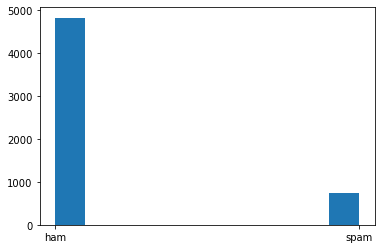

In [11]:
### Let look at the distribution of labels:
plt.hist(df["label"])
plt.show()

In [12]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

We have an imbalanced dataset, with 747 messages being spam messages and 4825 messages being ham.

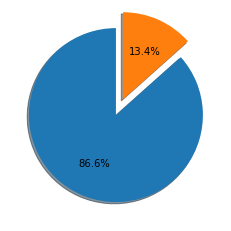

In [13]:
plt.pie(df["label"].value_counts(),autopct='%1.1f%%',shadow=True, startangle=90,explode = (0, 0.2))
plt.show()

The spam makes up 13.4% of the dataset while ham composes 86.6% of the dataset.

In [14]:
df["length"] = df["message"].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


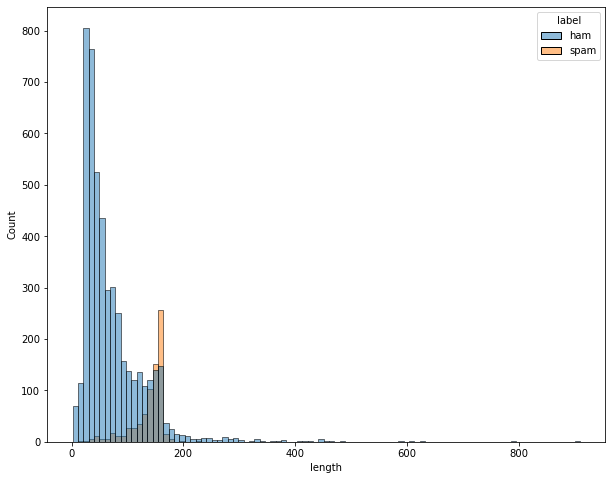

In [15]:
plt.figure(figsize = [10,8])
sns.histplot(data=df, x="length",hue="label")

It can be seen that ham messages are shorter than spam messages as the distribution of ham and spam message lengths are centered around 30-40 and 155-160 characters, respectively.

##### Make word cloud for ham and spam data

In [16]:
import wordcloud

In [17]:
df_ham = df[df["label"] == "ham"].copy()
df_spam = df[df["label"] == "spam"].copy()

In [18]:
def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

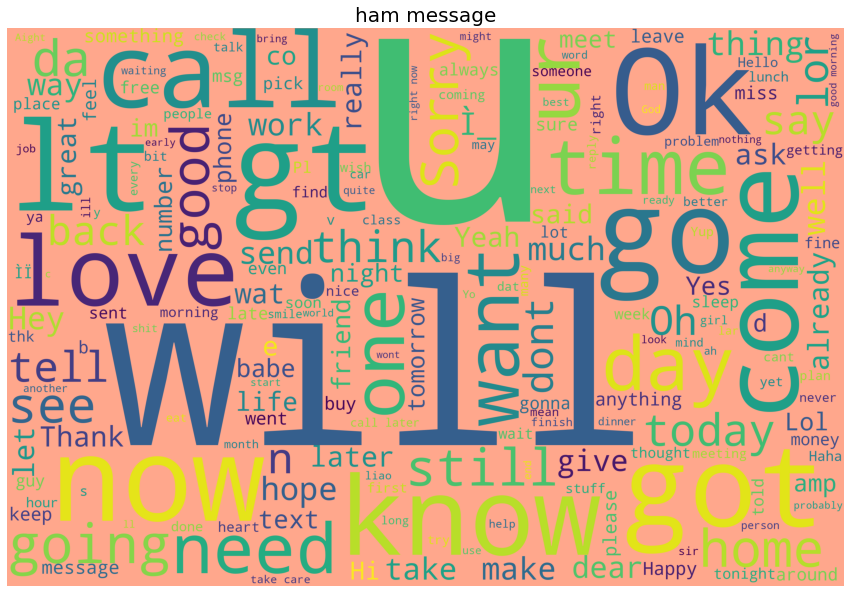

In [19]:
show_wordcloud(df_ham,"ham message")

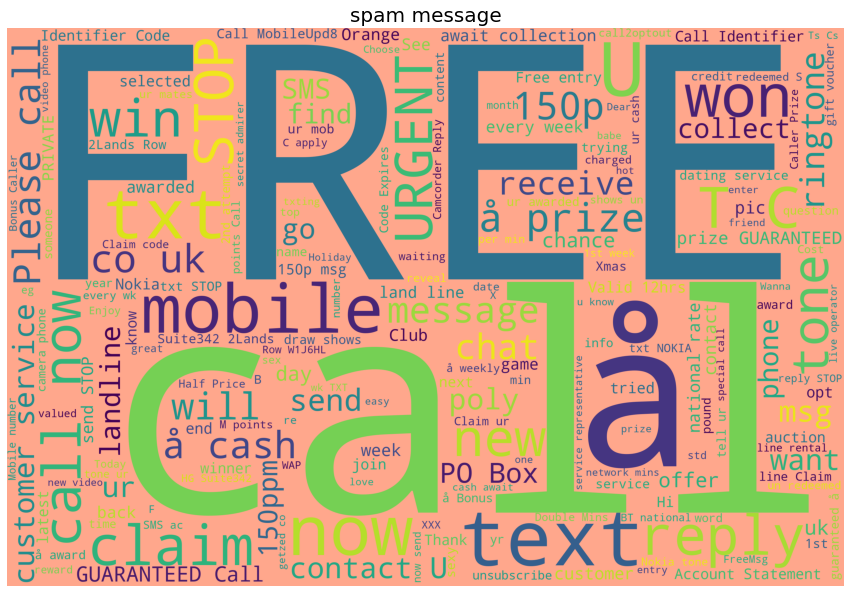

In [20]:
show_wordcloud(df_spam,"spam message")

#### Preprocess the Data

In [21]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [22]:
df.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['message'] = df['message'].str.lower()

#### Remove  “the”, “a”, “an”, “in”, "but", "because" etc from the message content.

In [24]:
from nltk.corpus import stopwords

In [25]:
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [26]:
df.head()

,label,message,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry number wkly comp win fa cup final t...,155
3,0,u dun say early hor u c already say,49
4,0,nah think goes usf lives around though,61


#### Perform stemming using Snowball Stemmer algorithm

In [27]:
import nltk

In [28]:
ss = nltk.SnowballStemmer("english")
df['message'] = df['message'].apply(lambda x: ' '.join(ss.stem(word) for word in x.split()))

In [29]:
df.head()

,label,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri number wkli comp win fa cup final t...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61


#### we create a Bag of Words (BOW) model to extract features from text

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
sms_df = df['message']

# creating a bag-of-words model

all_words = []
for sms in sms_df:
    words = word_tokenize(text = sms)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [32]:
all_words

FreqDist({'number': 2739, 'u': 1192, 'call': 672, 'go': 453, 'get': 451, 'ur': 385, 'symbolnumb': 325, 'gt': 318, 'lt': 316, 'åmoney': 303, ...})

In [33]:
print('Number of words: ',len(all_words))

Number of words:  6526


#### Implement an NLP technique

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf_model = TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(sms_df)

In [36]:
#serializing our model to a file called model.pkl
import pickle
pickle.dump(tfidf_model, open("model.pkl","wb"))

In [37]:
tfidf_data = pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6496,6497,6498,6499,6500,6501,6502,6503,6504,6505
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Spliting the data

In [38]:
### Separating Columns
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

In [39]:
df_train['label'] = df['label'].copy()

Y = df_train['label']
X = df_train.drop('label',axis=1)

In [40]:
# splitting training data into train and validation using sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

#### Model Building

In [41]:
import lightgbm as lgb
from sklearn.metrics import f1_score

In [42]:
model = lgb.LGBMClassifier()

In [43]:
model.fit(x_train, y_train)

LGBMClassifier()

In [44]:
pred = model.predict(x_test)
print("F1 score is: ",f1_score(pred, y_test))

F1 score is:  0.9200000000000002


#### Perform a random grid search for the best parameters for the model

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    "min_split_gain": [0.0, 0.1, 0.01],
    "min_child_weight": [0.001, 0.01, 0.1, 0.001],
    "min_child_samples": [20, 30, 25],
    "subsample": [1.0, 0.5, 0.8],
}

In [47]:
model = RandomizedSearchCV(model, param_grid, random_state=1)

In [48]:
model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=0.5 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=0.5 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=0.5 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.7166666666666667, subsample=0.8 will be ignored. Current value: bagging

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=0.5 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=0.5 will be ignored. Current value: bagging_fraction=0.7555555555555555
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.7555555555555555, subsample=0.5 will be ignored. Current value: bagging_fract

RandomizedSearchCV(estimator=LGBMClassifier(),
                   param_distributions={'bagging_fraction': array([0.6       , 0.63888889, 0.67777778, 0.71666667, 0.75555556,
       0.79444444, 0.83333333, 0.87222222, 0.91111111, 0.95      ]),
                                        'bagging_freq': [3, 4, 5, 6, 7],
                                        'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': [3, 4, 5, 6, 8, 12, 16,
                                                      -1],
                                        'min_child_samples': [20, 30, 25],
                                        'min_child_weight': [0.001, 0.0...
                                        'num_leaves': [8, 12, 16, 20, 24, 28,
                                                       32, 36, 40, 44, 48, 52,
                                                       56, 60, 64, 68, 72, 76,
                     

In [49]:
model.best_params_

{'subsample': 0.5,
 'reg_lambda': 0.47777777777777775,
 'reg_alpha': 0.5722222222222222,
 'num_leaves': 88,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'min_child_weight': 0.01,
 'min_child_samples': 30,
 'max_depth': 3,
 'learning_rate': 0.1,
 'bagging_freq': 3,
 'bagging_fraction': 0.6}

In [50]:
best_model = lgb.LGBMClassifier(subsample=0.5,
                            reg_lambda= 0.47777777777777775,
                            reg_alpha= 0.5722222222222222,
                            num_leaves= 88,
                            min_split_gain= 0.01,
                            min_data_in_leaf= 10,
                            min_child_weight= 0.01,
                            min_child_samples= 30,
                            max_depth= 3,
                            learning_rate= 0.1,
                            bagging_freq= 3,
                            bagging_fraction= 0.6,
                            random_state=1)

In [51]:
best_model.fit(x_train,y_train)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, max_depth=3,
               min_child_samples=30, min_child_weight=0.01, min_data_in_leaf=10,
               min_split_gain=0.01, num_leaves=88, random_state=1,
               reg_alpha=0.5722222222222222, reg_lambda=0.47777777777777775,
               subsample=0.5)

In [52]:
prediction = best_model.predict(x_test)
print("F1 score is: ",f1_score(prediction, y_test))

F1 score is:  0.891566265060241


#### Save the model

In [53]:
best_model.fit(tfidf_data,df["label"])
pickle.dump(best_model, open("spam_model.pkl","wb"))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
